# Выпускной проект
Проведение A/B-теста

# Задача

Провести оценку результатов A/B-теста.

**Техническое задание**

1. Название теста: recommender_system_test;
2. Группы: А (контрольная), B (новая платёжная воронка);
3. Дата запуска: 2020-12-07;
4. Дата остановки набора новых пользователей: 2020-12-21;
5. Дата остановки: 2021-01-04;
6. Аудитория: 15% новых пользователей из региона EU;
7. Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
8. Ожидаемое количество участников теста: 6000.
9. Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
 * конверсии в просмотр карточек товаров — событие product_page
 * просмотры корзины — product_cart
 * покупки — purchase.

## Описание данных
**/datasets/marketing_events.csv — календарь маркетинговых событий на 2020 год;**

Структура файла:
  
* name — название маркетингового события;
* regions — регионы, в которых будет проводиться рекламная кампания;
* start_dt — дата начала кампании;
* finish_dt — дата завершения кампании.

**/datasets/users.csv — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года;**

Структура файла:

* user_id — идентификатор пользователя;
* first_date — дата регистрации;
* region — регион пользователя;
* device — устройство, с которого происходила регистрация.

**/datasets/events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года;**

Структура файла:

* user_id — идентификатор пользователя;
* event_dt — дата и время события;
* event_name — тип события;
* details — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.

**/datasets/participants.csv — таблица участников тестов.**

Структура файла:

* user_id — идентификатор пользователя;
* ab_test — название теста;
* group — группа пользователя.

## Задачи исследования
1. Шаг 1. Откройте файл с данными и изучите общую информацию
2. Шаг 2. Предобработка данных
 * Изучить и обработать пропуски(если это возможно)
 * Обработать дубликаты
 * Изменить формат столбцов
3. Шаг 3. Оценка корректность проведения теста.
 * Соответствие данных требованиям технического задания. 
 * Время проведения теста. 
 * Аудиторию теста.
4. Шаг 4. Иследовательский анализ данных:
 * Количество событий на пользователя одинаково распределены в выборках?
 * Как число событий в выборках распределено по дням?
 * Как меняется конверсия в воронке в выборках на разных этапах?
 * Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?
5. A/B-тестирования:
 * Проверьте статистическую разницу долей z-критерием
6. Вывод

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [82]:
# <импорт библиотек>
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import math
from plotly import graph_objects as go
import plotly.express as px


# <настройки>
pd.set_option('display.max_columns',90000)
pd.set_option('display.float_format',lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', 0)

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Хорошо, модули загружены
</div>

In [83]:
# Создание переменных с данными
events = pd.read_csv('/datasets/final_ab_events.csv')
participants = pd.read_csv('/datasets/final_ab_participants.csv')
users = pd.read_csv('/datasets/final_ab_new_users.csv')
marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Для подгрузки данных можно использовать конструкцию `try-except`, она поможет избежать потенциальных ошибок при загрузке данных, связанных, например, с некорректным указанием путей.
        
Подробнее о конструкции по ссылке:
        
https://pythonworld.ru/tipy-dannyx-v-python/isklyucheniya-v-python-konstrukciya-try-except-dlya-obrabotki-isklyuchenij.html
        
Либо же можно использовать стандартную библиотеку os:
        
https://pythonworld.ru/moduli/modul-os.html

    
Несколько интересных статей кейсы использования конструкции:
    
https://www.programiz.com/python-programming/exception-handling
    
https://towardsdatascience.com/do-not-abuse-try-except-in-python-d9b8ee59e23b
    
https://www.techbeamers.com/use-try-except-python/
        
Как вариант в try можно указать корректные пути (в нашем случае глобальные) в except - некорректные (локальные). Можно также специфицровать тип ошибки, FileNotFoundError или задать кастомный тип ошибки (FilePathError, например)
        
Она полезна, если ты работаешь локально, а потом подгружаешь проект на платформу. Конструкция позволит не падать коду и локально, и на сервере ЯП, так как если не сработает один блок с путями, сработает другой.
        
Ну и вообще, в целом полезно про эту констуркцию знать, она универсальна и может быть использована в разных задачах.
</div>

In [84]:
# Создания цикла , который поочередно выведет информацию по нашим данным
for a in [events,participants,users,marketing_events]:
    display(a.head())
    display(a.info(5))
    display('Количество дубликатов',a.duplicated().sum())
    display('------------------------------')



,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


None

'Количество дубликатов'

0

'------------------------------'

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


None

'Количество дубликатов'

0

'------------------------------'

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


None

'Количество дубликатов'

0

'------------------------------'

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

'Количество дубликатов'

0

'------------------------------'

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Здорово, что используешь собственные функции
</div>

In [85]:
# Так как пропуски были только в событиях выведем пропуски
pd.DataFrame(round(events.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
user_id,0.000000
event_dt,0.000000
event_name,0.000000
details,85.800000


#### Вывод
* Были импортированы необходимые библиотеки
* Данным присвоены переменные
* Дубликатов не найдено
* Пропуски присутствуют в только в переменной final_ab_events и составляют 85% процентов датасета
* Необходимо изменить формат для ячеек содержащих даты

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

    
Отлично! Первый взгляд на данные есть

## Шаг 2. Предобработка данных

### Обработка пропусков

In [86]:
# Выведем события с пропусками
events.query('details.isnull()')['event_name'].value_counts()

login           189552
product_page    125563
product_cart    62462 
Name: event_name, dtype: int64

#### Вывод
Можно заметить что все пропуска находятся в событиях не связанных с оплатой, так как в столбце details отображаются данные об оплате. Оставляем пропуски как есть, в данном случае заменить числовым значением их нельзя.

Если правильно понял пропуски относятся к категории:
- **MNAR** (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Смотри, не есть хорошо, когда налево и направо пытаться заполнить пропуски. В реальной работе - сейчас заменил на ноль, а через месяц забыл и среднее подсчитал. Плюс могут быть моменты, когда покупка бонусная или подарок, будет ноль стоить. В общем, если можно оставить пропуски пропусками - а тут это можно сделать, то лучше так и сделать, на результаты, даже если мы что-то захотим подсчитать - это не повлияет

### Изменение формата ячеек

In [87]:
events['event_dt'] = events['event_dt'].astype('datetime64[D]')
users['first_date'] = pd.to_datetime(users['first_date'], format='%Y-%m-%d')
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'], format='%Y-%m-%d')
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'], format='%Y-%m-%d')

In [88]:
merge_table_all = events.merge(participants, on = 'user_id')
merge_table_all = merge_table_all.merge(users, on ='user_id')
merge_table_all.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})

user_id
ab_test                 group         
interface_eu_test       A      5467   
                        B      5383   
recommender_system_test A      2747   
                        B      928

#### Вывод
Произведена замена формата ячеек с датой, final_ab_events['event_dt'] также убрано время, так как оно не используется в дальнейшем анализе

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Было бы хорошо привести более детальные выводы по категориальным данным: количество тестов (именно на этапе предобработки), регионов, устройств.
</div>

## Шаг 3. Оценка корректность проведения теста.

### Данные по времени теста и набору пользователей:

1. Дата запуска: 2020-12-07;
2. Дата остановки набора новых пользователей: 2020-12-21;
3. Дата остановки: 2021-01-04;

In [89]:
rec = users.merge(participants, on = 'user_id')
rec = rec.query('ab_test == "recommender_system_test"')
print('Данные о пользователях с',rec['first_date'].min(), 'по',rec['first_date'].max() )
# Выведем даты максимальную и минимальную по регистрации пользователя и события
print('Данные о событиях с',events['event_dt'].min(), 'по',events['event_dt'].max() )
print('Данные о пользователях с',rec['first_date'].min(), 'по',rec['first_date'].max() )

Данные о пользователях с 2020-12-07 00:00:00 по 2020-12-21 00:00:00
Данные о событиях с 2020-12-07 00:00:00 по 2020-12-30 00:00:00
Данные о пользователях с 2020-12-07 00:00:00 по 2020-12-21 00:00:00


#### Вывод
Видим, что данные:
 * Дата запуска соответствует ТЗ в обоих случаях
 * Данные по зарегистрированным пользователям были выгруженные по 21 число, что соответствует ТЗ 
 * Дата остановки не соответсвует ТЗ данные по остановки события были выгружены до 2020-12-30, а должны были по 2021-01-04

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Согласен, тест остановлен раньше на 5 дней
</div>

### Убедитесь, что оно не совпадает с маркетинговыми и другими активностями


In [90]:
# Выведем маркетинговые события по дате
display(marketing_events.query('start_dt >= "2020-12-01"'))

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


#### Вывод
В соответсвие с регионом проведения теста EU, наша испытуемая группа попала под влияние 'Christmas&New Year Promo', что непосредственно отразится на результативности данных

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

События, праздники и тп - влияют на две группы одинаково. Это просто изменение качества пользователей, но относительную конверсию группы В к группе А - не будет иметь воздействие. Но это нужно учитывать при изучении абсолютных данных.
</div>

### Пересечение пользователей в конкурирующих тестах

In [91]:
# Обьединим таблицы методом merge использовал столбец user как основной получим таблицу с пользователями участвующмим в тестах и нет
users_participants = users.merge(participants, how='left', on='user_id')
users_participants.groupby(['ab_test', 'group', 'region'], as_index=False).agg({'user_id':'nunique'})


,ab_test,group,region,user_id
0,interface_eu_test,A,EU,5831
1,interface_eu_test,B,EU,5736
2,recommender_system_test,A,APAC,37
3,recommender_system_test,A,CIS,25
4,recommender_system_test,A,EU,3634
5,recommender_system_test,A,N.America,128
6,recommender_system_test,B,APAC,35
7,recommender_system_test,B,CIS,30
8,recommender_system_test,B,EU,2717
9,recommender_system_test,B,N.America,95


#### Вывод
**Видим что в базе данных находятся пользователи из разных тестов и из разных регионов**

In [92]:
# создаю список уникальных id пользователей в группе
interface_eu_test = users_participants.query('ab_test =="interface_eu_test" & region=="EU"')['user_id'].unique()
recommender_system_test = users_participants.query('ab_test =="recommender_system_test" & region=="EU"')['user_id'].unique()

# проверяем данные на пользователей одновременно находлящихся в двух группах
dubl = set(interface_eu_test) & set(recommender_system_test)
print(len(dubl))

1602


#### Вывод
Видим, что паралельно с нашим тестом проводился тест который назывался interface_eu_test и можно предположить что это тест тестового интерфейса для пользователей европы

**Тест интерфейса:**
* Группа А 5831 человек
* Группа В 5736 человек

**Тест рекомендательной системы:**

* Группа А 3634 человек
* Группа В 2717 человек

Количество пользователей попавших в оба теста в регионе EU 1602 человека

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__
    
Верное наблюдение.    
    
В данной ситуации, наиболее корректным решением будет проверить в какие именно группы теста interface_eu_test попали пользователи теста recommender_system_test. Ведь если они попали только в контрольную группу - это значит, что тест interface_eu_test никак на них не повлиял
</div>

### Распределение пользователей участвующих в обоих тестах

In [93]:
# Создадим переменную с пользователями попавшими в оба теста 
participants_dubl = users_participants[users_participants['user_id'].isin(dubl)]
participants_dubl.groupby(['ab_test', 'group'], as_index=False).agg({'user_id':'nunique'})

,ab_test,group,user_id
0,interface_eu_test,A,819
1,interface_eu_test,B,783
2,recommender_system_test,A,921
3,recommender_system_test,B,681


#### Вывод
Видим распределение людей которые участвовали в обоих тестах, получается люди участвующие в теста обновленного интерфейса могли оказать влияние на проведение теста по изменению рекомендаций.

### Определение пользователей из теста по изменению интерфейса и чистка данных от этих пользователей

In [94]:
# Создадим переменную с пользователями  с измененым интерфейсом
id_participants_B =  participants_dubl.query('ab_test == "interface_eu_test" & group =="B"')['user_id']

In [95]:
# выделяеи пользователей, участвующих в обоих тестах, в отдельный датафрейм
participants_new_B = participants[participants['user_id'].isin(id_participants_B)]

# оставляем среди них пользователей только нашего теста:
participants_new_B = participants_new_B.query('ab_test == "recommender_system_test"')
# Веделим как рапределены пользователи с новым интерфейсом в нашем тесте
participants_new_B.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})

user_id
ab_test                 group         
recommender_system_test A      439    
                        B      344

In [96]:
# Обновляем датасет удалив из него пользователей группы B с измененным интерфейсом
participants = participants[~participants['user_id'].isin(participants_new_B['user_id'])]
# Оставляем польхзователей только нашего теста
participants = participants.query('ab_test == "recommender_system_test"')

participants.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})

user_id
ab_test                 group         
recommender_system_test A      3385   
                        B      2533

In [97]:
# создаю список уникальных id пользователей в группе
interface_test = participants.query('ab_test =="recommender_system_test" & group=="A"')['user_id'].unique()
recommender_system_test = participants.query('ab_test =="recommender_system_test" & group=="B"')['user_id'].unique()

# проверяем данные на пользователей одновременно находлящихся в двух группах
dubl = set(interface_test) & set(recommender_system_test)
print(len(dubl))

0


#### Вывод

**Тест рекомендательной системы:** Был:

* Группа А 3634 человек
* Группа В 2717 человек

**Тест рекомендательной системы:** Стал:

* Группа А 3385 человек
* Группа В 2533 человек

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида__

Да, внутри теста всё хорошо
</div>

### Ожидаемое количество участников теста и аудитория 

In [98]:
## Дата остановки набора пользователя 2020-12-21 , создаем новую переменную по ТЗ теста
''' 
 Так как начала набора пользователей соответствовало условиям нам необходимо ограничить 
     дату регистрации пользователей исключив лишние 2 дня, а именно 22 и 23 число
'''
eu_users = users.query('region == "EU" & first_date <= "2020-12-21"')['user_id'].nunique()

test_users = participants['user_id'].nunique()

test_users / eu_users*100

13.977326405290505

#### Вывод

После очистки пользователей, что было необходимо:
* Доля пользователей  EU  не соответсвует ТЗ и состовляет 13.97
* Ожидаемое количество участников 5918 из EU , что  не соответствует ТЗ

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Ты верно посчитал этот пункт
</div>

### Определение пользователей совершивших событие 

In [99]:
# добавим информацию в таблицу merge_table:
merge_table = events.merge(participants, on = 'user_id')
merge_table = merge_table.merge(users, on = 'user_id')


In [100]:
# подсчитаем разницу в днях между регистрацией и событием
merge_table['diff'] = merge_table['event_dt'] - merge_table['first_date']

# уберем все, что находится за границей 14 дней с момента регистрации
merge_table = merge_table.query('diff <= "14 days"')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Корректная реализация. Молодец!
</div>

In [101]:
merge_table.groupby('group').agg({'user_id': 'nunique'}).reset_index()

,group,user_id
0,A,2422
1,B,822


#### Вывод
Видим пользователей совершивших хотябы одно событие в течение 14 дней с момента регистрации.
Существует оченб большое отличие у иследуемых группп группа В по размеру на 66% меньше группы А

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__
    
По поводу неактивных пользователей - то могут быть пользователи, которые только зарегистрировались и больше не заходили на ресурс или может быть ошибка в логировании. Если первое - то таких пользователей нужно учитывать, а если второе - то лучше отфильтровать.
    
Как мы можем проверить - посмотреть на распределение этих пользователей в группе А и В, а также динамику их набора по дням. По идее, мы должны иметь плюс-минус схожее поведение для групп А и В. Если будут какие-то аномальные данные, то скорее всего это ошибка в сборе данных.
    

</div>

## Иследовательский анализ данных

### Количество событий на пользователя одинаково распределены в выборках?

In [102]:
# вывод статистических данных в разрезе групп
us_events = merge_table.pivot_table (index='user_id', values='event_name', columns='group', aggfunc='count').reset_index()
us_events.describe()

group,A,B
count,2422.00,822.00
mean,6.95,5.42
std,3.85,3.24
min,1.00,1.00
25%,4.00,3.00
50%,6.00,4.00
75%,9.00,6.00
max,24.00,24.00


In [103]:
events_a_b= merge_table.pivot_table(index='event_name', values='user_id', columns='group', aggfunc='count')
events_a_b = events_a_b.div(events_a_b.sum(axis = 1), axis = 0)*100

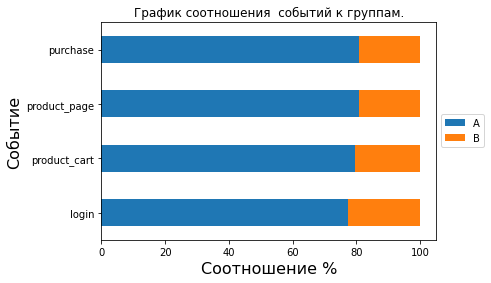

In [104]:
events_a_b.plot(kind = 'barh',stacked = True)
plt.title('График соотношения  событий к группам.')
plt.xlabel('Соотношение %',fontsize=16)
plt.ylabel('Событие',fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.6))

,event_name,group,user_id
0,login,A,7450
1,login,B,2184
2,product_cart,A,2248
3,product_cart,B,576
4,product_page,A,4804
5,product_page,B,1148
6,purchase,A,2319
7,purchase,B,547


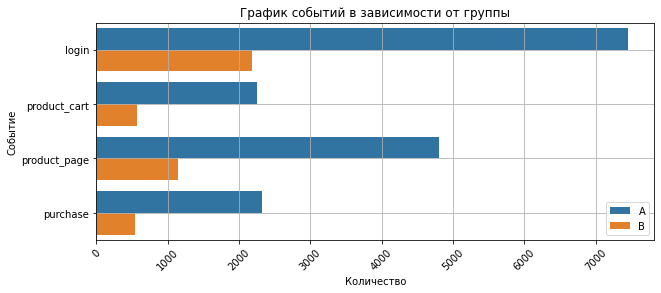

In [105]:
data_ed = merge_table.groupby(['event_name', 'group'], \
                        as_index = False)[['user_id']].count()
display(data_ed)
plt.figure(figsize=(10, 4))
# строим столбчатый график средствами seaborn
sns.barplot(x='user_id', y='event_name', data=data_ed, hue='group')
# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График событий в зависимости от группы')
plt.xlabel('Количество')
plt.ylabel('Событие')
# поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)
# выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)
# добавляем сетку
plt.grid()
# отображаем график на экране
plt.show()

#### Вывод
1. Всего пользователей совершивших события: 3244
2. Минимальное количество событий совершенных событий для группы A и B на пользователя 1, максимальное количество событий  для группы A и B на пользователя  24
3. Средлнее количество событий на пользователя группы А 6.95, для группы В 5.42
4. Мидианное количество событий на пользователя группы А 6, для группы В 4
5. По относительному соотношению можем заметить,  что количество событий группы В состовляет примерно 20% от всего числа зобытий
6. По абсолютным значения можно также преобладание группы А над Группой В

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__


Здорово, что сравнил среднее значение по двум группам. В идеале можно провести ещё стат тест
</div>

### Как число событий в выборках распределено по дням?

In [106]:
merge_table_all.groupby(['ab_test', 'group']).agg({'user_id': 'nunique'})

user_id
ab_test                 group         
interface_eu_test       A      5467   
                        B      5383   
recommender_system_test A      2747   
                        B      928

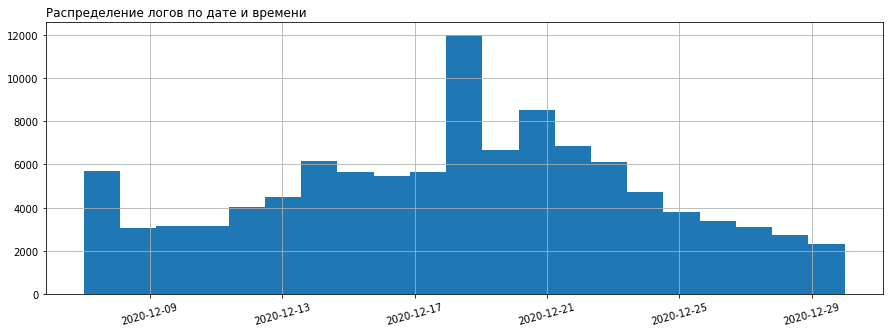

In [107]:
plt.title('Распределение логов по дате и времени', loc='left')
merge_table_all['event_dt'].hist(bins=21, xrot=15,  figsize=(15, 5), alpha=1)
plt.show()


    Можем заметить что пик событий произошел 18 декабря, 19 дакабря спад по событиям и резкий взплеск 21 числа поле этого прослеживается плавный спад до конца выгрузки


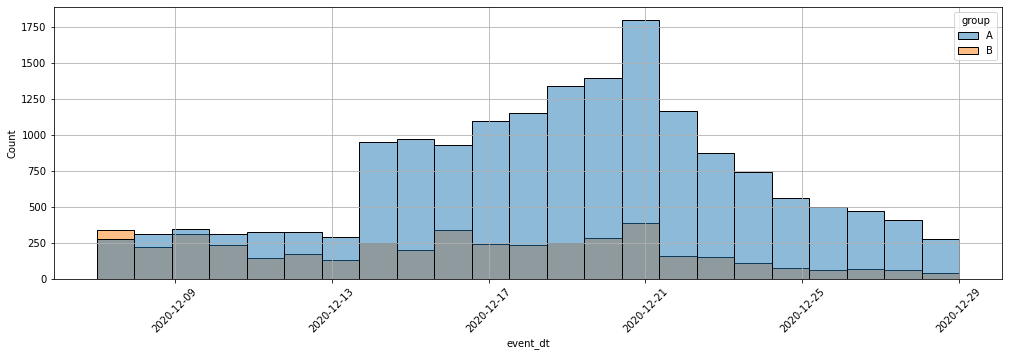

In [108]:
plt.figure(figsize=(17, 5))
plt.xticks(rotation=45)
sns.histplot(data=merge_table, x="event_dt", hue="group", bins = 23)
plt.grid()
plt.show()

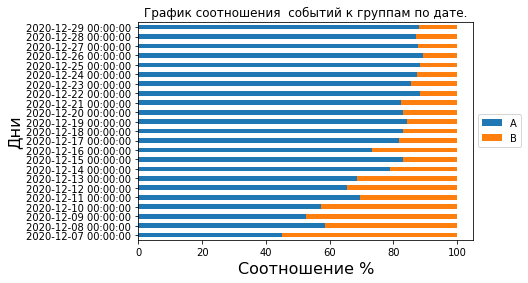

In [109]:
events_a_b= merge_table.pivot_table(index='event_dt', values='user_id', columns='group', aggfunc='count')
events_a_b = events_a_b.div(events_a_b.sum(axis = 1), axis = 0)*100
events_a_b.plot(kind = 'barh',stacked = True)
plt.title('График соотношения  событий к группам по дате.')
plt.xlabel('Соотношение %',fontsize=16)
plt.ylabel('Дни',fontsize=16)
plt.legend(bbox_to_anchor=(1, 0.6))

<div class="alert alert-info"> <b>Комментарии студента:</b>
В графике распределения можем заметить что соотношения группы В выше к группе А в первые дни нашего теста,с 7 по 13 число в дальнейшем можно заметить снижение соотношения. После 16 числа соотношение подает и сохраняетсч на низком уровне. Необходимо 

</div>

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №3__


14 - день когда активные пользователи перестали набираться в группе А
</div>

### Как меняется конверсия в воронке в выборках на разных этапах?

In [110]:
funnel_group = (merge_table.
          groupby('event_name').
          agg({'user_id': 'nunique'}).
          reset_index().
          rename(columns={'user_id' : 'total_users'})
               )
funnel_group['№'] = [1, 3, 2, 4]
funnel_group = funnel_group.sort_values(by='№')
funnel_group

,event_name,total_users,№
0,login,3243,1
2,product_page,2030,2
1,product_cart,953,3
3,purchase,999,4


In [111]:
ax = go.Figure(go.Funnel(
    y = funnel_group['event_name'],
    x = funnel_group['total_users'],
    textinfo = 'value + percent previous + percent initial'))
ax.update_layout(title_text='Воронка событий')

ax.show()

#### Вывод
Во общей воронке событий без раздела на группы можно, можем увидеть что больие потери наблюдаются на переходе от логирования к просмотру карточки.  Также потери в 53 % наблюдаются при переходе от просмотра карточки товара к просмотру корзины.
Так же на шаге от логирования к просмотру корзины доходит только 29% пользователей, а от логирования до покупки 31%

In [112]:
funnel_group = (merge_table.
          groupby(['event_name', 'group']).
          agg({'user_id': 'nunique'}).
          reset_index().
          rename(columns={'user_id' : 'total_users'}).
          sort_values(by=['group','total_users'], ascending=False))


funnel_group['№'] = [1, 2, 4, 3,5,6,8,7]
funnel_group = funnel_group.sort_values(by='№')
funnel_group

,event_name,group,total_users,№
1,login,B,821,1
5,product_page,B,459,2
3,product_cart,B,225,3
7,purchase,B,226,4
0,login,A,2422,5
4,product_page,A,1571,6
2,product_cart,A,728,7
6,purchase,A,773,8


In [113]:
fig = go.Figure()

fig.add_trace(go.Funnel(name = 'A',
                        y = funnel_group.query('group == "A"')['event_name'],
                        x = funnel_group.query('group == "A"')['total_users'],
                        textposition = 'inside',
                        textinfo = 'value + percent previous'))

fig.add_trace(go.Funnel(name = 'B',
                        y = funnel_group.query('group == "B"')['event_name'],
                        x = funnel_group.query('group == "B"')['total_users'],
                        textposition = 'inside',
                        textinfo = 'value + percent previous'))
                      
fig.update_layout(title_text='Воронка событий в разрезе  групп A и B')
fig.show()

#### Вывод
Видим нарушение последовательности событий:
Наша воронка выглядит:
1. Авторизация
2. Просмотр карточки товара
3. Покупка
4. Добавление в корзину

Нарушена последовательность 3 и 4 действий, они должны быть в другой последовательности. Возможно существует возможность покупки товара без просмотра корзины. так же можем видеть снижение от регистрации к просмотру карточки товара с 65 в группе А до 56 в группе В . После введения новой рекомендательной системы процент покупок не увеличился, так же на это оказывает влияние малый размер тестовой группы.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Здорово, что заметил данный нюанс. Это может говорить о том, что на платформе нестрогая воронка продаж и можно приобрести продукт минуя некоторые этапы 
</div>

### Какие особенности данных нужно учесть, прежде чем приступать к A/B-тестированию?

1. Неравномерное распределение пользователей
2. Невыполнение ТЗ по длительности проведения теста
3. Период проведения теста совпадает с проведением параллельного теста
4. Параллельно в регионе проходит рождественская промо акция.
5. Планируемое количество участников ниже ТЗ
6. Нарушение последовательности воронки
7. Большое число неактивных пользователей попавших в группу В

## A/B - тест

<div class="alert alert-info"> <b>Комментарии студента:</b>
Сделал, добавил исправленную функцию ниже прошлой

</div>

**Чтобы снизить вероятность ложнопозитивного результата при множественном тестировании гипотез, применим метод Бонферони. Для этого поделим принятый уровень значимости (0.05) на число сравнений**

H_0 - Нулевая гипотеза: есть основания считать доли равными

H_1 - Отвергаем  нулевую гипотезу, нет оснований считать доли равными

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида __

Верная интерпретация нулевой и альтернативной гипотез
</div>

In [118]:
def z_test(df1, df2, event, alpha, n):
    '''    
Функция принимает на вход два датафрейма с логами и по заданному событию попарно проверяет 
есть ли статистически значимая разница между долями пользователей, совершивших его в группе 1 и группе 2.

Входные параметры:
    - df1, df2 - датафреймы с логами
    - event - событие
    - alpfa - критический уровень статистической значимости
    - n - поправка Боннферони для критического уровня статистической значимости 
    Если мы выполняем сразу 4 статистических теста в случае AB - теста (сравниваем A и B логи) и хотим использовать α = 0,05 для каждого теста, 
    поправка Бонферрони говорит нам, что мы должны использовать α  = 0,05/4
    
    ''' 
    
    # критический уровень статистической значимости c поправкой Бонферрони
    bonferroni_alpha = alpha / n
 
    # число пользователей в группе 1 и группе 2:
    n_users = np.array([df1['user_id'].nunique(), 
                        df2['user_id'].nunique()])

    # число пользователей, совершивших событие в группе 1 и группе 2
    success = np.array([df1[df1['event_name'] == event]['user_id'].nunique(), 
                        df2[df2['event_name'] == event]['user_id'].nunique()])

    # пропорции успехов в группах:
    p1 = success[0]/n_users[0]
    p2 = success[1]/n_users[1]
    
    print(success[0], success[1], n_users[0],n_users[1])
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (n_users[0] + n_users[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference /  np.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2   #тест двусторонний, удваиваем результат
    
    print('Событие:', event)
    print('p-значение: ', p_value)

    if p_value < bonferroni_alpha:
        print('Отвергаем нулевую гипотезу: между долями есть разница')
    else:
        print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

 

Здорово, что ты знаешь о такого рода поправках и успешно используешь в своем проекте!
    
Также можно отметить, что с уменьшением уровня значимости, но уменьшается и мощность теста,  тем самым увеличивается вероятность ошибки второго рода. Такой вот компромисс

Это довольно распространенная тема, поэтому рекомендую ознакомиться более подробно - https://youtu.be/qbbY7ubzDoE.

</div>

In [115]:
for event in merge_table['event_name'].unique():
    z_test(merge_table[merge_table['group'] == "A"], merge_table[merge_table['group'] == "B"], event, .05, 4)
    print()

773 226 2422 822
Событие: purchase
p-значение:  0.01764968717521609
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

728 225 2422 822
Событие: product_cart
p-значение:  0.14412076974264498
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

2422 821 2422 822
Событие: login
p-значение:  0.08601687380547407
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

1571 459 2422 822
Событие: product_page
p-значение:  3.8415005565450855e-06
Отвергаем нулевую гипотезу: между долями есть разница



In [116]:
def z_test(df1, df2, event, alpha, n):
    '''    
Функция принимает на вход два датафрейма с логами и по заданному событию попарно проверяет 
есть ли статистически значимая разница между долями пользователей, совершивших его в группе 1 и группе 2.

Входные параметры:
    - df1, df2 - датафреймы с логами
    - event - событие
    - alpfa - критический уровень статистической значимости
    - n - поправка Боннферони для критического уровня статистической значимости 
    Если мы выполняем сразу 4 статистических теста в случае AB - теста (сравниваем A и B логи) и хотим использовать α = 0,05 для каждого теста, 
    поправка Бонферрони говорит нам, что мы должны использовать α  = 0,05/4
    
    ''' 
    
    # критический уровень статистической значимости c поправкой Бонферрони
    bonferroni_alpha = alpha / n
 
    # число пользователей в группе 1 и группе 2:
    n_users = np.array([df1['user_id'].nunique(), 
                        df2['user_id'].nunique()])

    # число пользователей, совершивших событие в группе 1 и группе 2
    success = np.array([df1[df1['event_name'] == event]['user_id'].nunique(), 
                        df2[df2['event_name'] == event]['user_id'].nunique()])

    # пропорции успехов в группах:
    p1 = success[0]/n_users[0]
    p2 = success[1]/n_users[1]
    
    print(success[0], success[1], n_users[0],n_users[1])
    
    # пропорция успехов в комбинированном датасете:
    p_combined = (success[0] + success[1]) / (n_users[0] + n_users[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference /  np.sqrt(p_combined * (1 - p_combined) * (1/n_users[0] + 1/n_users[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2   #тест двусторонний, удваиваем результат
    
    print('Событие:', event)
    print('p-значение: ', p_value)

    if p_value < bonferroni_alpha:
        print("Отвергаем нулевую гипотезу между долями есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, доли равны")

In [117]:
for event in merge_table['event_name'].unique():
    z_test(merge_table[merge_table['group'] == "A"], merge_table[merge_table['group'] == "B"], event, .05, 4)
    print()

773 226 2422 822
Событие: purchase
p-значение:  0.01764968717521609
Не получилось отвергнуть нулевую гипотезу, доли равны

728 225 2422 822
Событие: product_cart
p-значение:  0.14412076974264498
Не получилось отвергнуть нулевую гипотезу, доли равны

2422 821 2422 822
Событие: login
p-значение:  0.08601687380547407
Не получилось отвергнуть нулевую гипотезу, доли равны

1571 459 2422 822
Событие: product_page
p-значение:  3.8415005565450855e-06
Отвергаем нулевую гипотезу между долями есть разница



<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Методологически проверка гипотез проведена верно и наглядный вывод результатов
</div>

## Вывод

**Вид данных**

К вид данных на момент выгрузки достаточно хорошие, нет дубликатов, пропуски присутсвуют только в тех случаях  когда они обусловлены отсутсвием покупки, так как в столбце с пропусками содержатся значения при покупки.

**Описание  данных ТЗ**

Очень большое количество наружений ТЗ которые оказывают влияние на проведение теста:
* Несоответствие выгруженных данных по событиям отсутсвуют данные за 31,1,2,3,4 число (потеряно 5 дней)
* Пользователи были набраны согласно с ТЗ
* Проведение нашего теста пересекается с проведением теста по изменению интерфейса, и пользователи с новым интерфейсам попали в наш тест
* Количество новых пользователей меньше планируемого в 15%
* Общее количество участников теста менее планируемых 6000
* Преведение теста совпало со временем проведения промо акций к новому году
* Активных пользователей в группе А оказалось больше чем в В в соотношениие 4/1
1. Группа А Активный пользователей 2422
2. Группа В Активный пользователей 822
3. Группа А 3385 всего участников
4. Группа В 2533 всего участников
* Большая часть неактивных пользолвателей в группе В
5. В распределении событий по дням можем заметить что соотношения группы В выше к группе А в первые дни нашего теста,с 7 по 13 число в дальнейшем можно заметить снижение соотношения. После 16 числа соотношение подает и сохраняетсч на низком уровне. Необходимо проверить наблюдались ли какие то ошибки в работе приложения для тестовой группы в эти дни.

**Воронка событий в разрезе  групп A и B**

1. Не отслеживается ожидаемая воронка событий: Авторизация -> Просмотр товара -> Просмотр корзины -> Покупка.

2. В нашем случае воронка событий выглядит: Авторизация -> Просмотр товара -> Покупка -> Просмотр корзины. Для обеих тестовых групп

Возможно существует возможность покупки товара через страницу просмотра товара, минуя просмотр корзины. 


3. По общей воронки без разделения на группы можно заметить , что:
* наблюдаются  больие потери  на переходе от логирования к просмотру карточки
* к просмотру корзины доходит только 29% пользователей
* от логирования до покупки 31%

4. Была исправлена последовательность воронки в разбивке по группам, можно заметить что:
* В обеих группах переход от просмотра корзины к покупки, составлет более 100%
* также потери в 53 % наблюдаются при переходе от просмотра карточки товара к просмотру корзины.

В обоих случаях потери для  от перехода  Авторизация -> Просмотр товара составляют ≈ 40%, это может относиться к проблемами системы или неправильная робата алгоритмов предложения товара.

**А/В Тест**

Результатом проведения новой системы рекомендации должны были быть: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%

По результатам проведения А/В - теста

* Событие: purchase
Не получилось отвергнуть нулевую гипотезу, доли равны

* Событие: product_cart
Не получилось отвергнуть нулевую гипотезу, доли равны

* Событие: login
Не получилось отвергнуть нулевую гипотезу, доли равны

* Событие: product_page
Отвергаем нулевую гипотезу между долями есть разница

Ожидаемые результаты не были достигнуты

Таким образом, по имеющимся данным (которые нарушают ТЗ), новая рекомендательная система целевые метрики не улучшила.

**Итог: Все вышеперечисленные факторы могут исказить результаты тестирования. Для чистоты эксперимента необходимо доработать механизм формирования тестовых групп и запустить тест заново, предварительно сверившись с календарём маркетинговых акций**

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида__

От себя хочу порекомендовать тебе отличные источники про AB тестирование
    
- Книга Доверительное A/B тестирование | Рон Кохави (https://dmkpress.com/catalog/computer/software_development/978-5-97060-913-2/)
- Как устроено A/B-тестирование в Авито (https://habr.com/ru/company/avito/blog/454164/)
- Как улучшить ваши A/B-тесты: лайфхаки аналитиков Авито. Часть 1 (https://habr.com/ru/company/avito/blog/571094/)
- Как улучшить ваши A/B-тесты: лайфхаки аналитиков Авито. Часть 2 (https://habr.com/ru/company/avito/blog/571096/)
    
---
    

всё чудно😊. Твой проект так и просится на github =)   
    
Поздравляю с успешным завершением проекта 😊👍
</div>